# TALLER 1

4.A partir de los conjuntos de datos seleccionados, construya un único
dataset que integre la totalidad de los delitos ocurridos por departamento y
municipio.

In [119]:
# Importing required libraries

import re
from random import randint
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylev
import seaborn as sbn

In [120]:
# Parameter for showing all columns when printing a dataframe
pd.set_option('display.max_columns', None)

In [121]:
dane_df=pd.read_csv('./data/Dane.csv')

In [122]:
dane_df.dtypes

CODIGO DANE      int64
DEPARTAMENTO    object
MUNICIPIO       object
dtype: object

In [123]:
dane_df.head()

,CODIGO DANE,DEPARTAMENTO,MUNICIPIO
0,99,OTRO,NO RESIDENTE EN EL PAIS
1,5001,ANTIOQUIA,MEDELLIN
2,5002,ANTIOQUIA,ABEJORRAL
3,5004,ANTIOQUIA,ABRIAQUI
4,5021,ANTIOQUIA,ALEJANDRIA


In [189]:
poblacion_df=pd.read_excel("./data/proyeccion.xlsx")
poblacion_df.head(12)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PROYECCIONES DE POBLACIÓN MUNICIPAL POR ÁREA.,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,PROYECCIONES DE POBLACIÓN A NIVEL MUNICIPAL. P...,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
poblacion_df.drop(range(0,10),axis=0, inplace= True)
poblacion_df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
10,DP,DPNOM,DPMP,MPIO,AÑO,ÁREA GEOGRÁFICA,Total
11,05,Antioquia,05001,Medellín,2018,Cabecera Municipal,2382399
12,05,Antioquia,05001,Medellín,2018,Centros Poblados y Rural Disperso,44730
13,05,Antioquia,05001,Medellín,2018,Total,2427129
14,05,Antioquia,05001,Medellín,2019,Cabecera Municipal,2439470
15,05,Antioquia,05001,Medellín,2019,Centros Poblados y Rural Disperso,44075
16,05,Antioquia,05001,Medellín,2019,Total,2483545
17,05,Antioquia,05001,Medellín,2020,Cabecera Municipal,2490164
18,05,Antioquia,05001,Medellín,2020,Centros Poblados y Rural Disperso,43260
19,05,Antioquia,05001,Medellín,2020,Total,2533424


In [192]:
poblacion_df.columns

Unnamed: 0    object
Unnamed: 1    object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
Unnamed: 5    object
Unnamed: 6    object
dtype: object

In [193]:
poblacion_df.columns=["DP","DEPARTAMENTO","CODIGO DANE","MUNICIPIO","AÑO", "AREA","POBLACION"]

In [197]:
poblacion_df.drop(10,axis=0, inplace= True)

In [198]:
poblacion_df.head()

,DP,DEPARTAMENTO,CODIGO DANE,MUNICIPIO,AÑO,AREA,POBLACION
11,05,Antioquia,05001,Medellín,2018,Cabecera Municipal,2382399
12,05,Antioquia,05001,Medellín,2018,Centros Poblados y Rural Disperso,44730
13,05,Antioquia,05001,Medellín,2018,Total,2427129
14,05,Antioquia,05001,Medellín,2019,Cabecera Municipal,2439470
15,05,Antioquia,05001,Medellín,2019,Centros Poblados y Rural Disperso,44075


In [199]:
poblacion_df.dtypes

DP              object
DEPARTAMENTO    object
CODIGO DANE     object
MUNICIPIO       object
AÑO             object
AREA            object
POBLACION       object
dtype: object

In [227]:
poblacion_df['CODIGO DANE'] = poblacion_df['CODIGO DANE'].astype('int64')
poblacion_df['AÑO'] = poblacion_df['AÑO'].astype('int64')
poblacion_df['POBLACION'] = poblacion_df['POBLACION'].astype('float64')

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_20948\3485965194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poblacion_df['CODIGO DANE'] = poblacion_df['CODIGO DANE'].astype('int64')
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_20948\3485965194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poblacion_df['AÑO'] = poblacion_df['AÑO'].astype('int64')
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_20948\3485965194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [228]:
poblacion_df.dtypes

DP               object
DEPARTAMENTO     object
CODIGO DANE       int64
MUNICIPIO        object
AÑO               int64
AREA             object
POBLACION       float64
dtype: object

In [229]:
poblacion_df

,DP,DEPARTAMENTO,CODIGO DANE,MUNICIPIO,AÑO,AREA,POBLACION
25,05,Antioquia,5001,Medellín,2022,Total,2612958.0
79,05,Antioquia,5002,Abejorral,2022,Total,20920.0
133,05,Antioquia,5004,Abriaquí,2022,Total,2820.0
187,05,Antioquia,5021,Alejandría,2022,Total,4845.0
241,05,Antioquia,5030,Amagá,2022,Total,32259.0
...,...,...,...,...,...,...,...
60343,97,Vaupés,97889,Yavaraté (CD),2022,Total,1211.0
60397,99,Vichada,99001,Puerto Carreño,2022,Total,20798.0
60451,99,Vichada,99524,La Primavera,2022,Total,9846.0
60505,99,Vichada,99624,Santa Rosalía,2022,Total,4297.0


In [212]:
#Se filtra para la totalidad del area y para el año 2022
poblacion_df=poblacion_df.loc[(poblacion_df["AÑO"]==2022) & (poblacion_df["AREA"]=="Total")]

In [214]:
# Loading data
terrorismo_df = pd.read_csv("./data/terrorismo_bk.csv")
homicidios_df = pd.read_csv("./data/homicidios_bk.csv")
hurto_df = pd.read_csv("./data/hurto.csv")
secuestro_df = pd.read_csv("./data/secuestro_BK.csv")

In [368]:
#CAMBIO DE NOMBRES
for z in range (0,len(secuestro_df)):
    for y in range (0,len(dane_df)):
        if secuestro_df['CODIGO DANE'][z]==dane_df['CODIGO DANE'][y]:
            secuestro_df['MUNICIPIO'][z]=dane_df['MUNICIPIO'][y]
            secuestro_df['DEPARTAMENTO'][z]=dane_df['DEPARTAMENTO'][y]
                                                


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_20948\3416286246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secuestro_df['MUNICIPIO'][z]=dane_df['MUNICIPIO'][y]
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_20948\3416286246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  secuestro_df['DEPARTAMENTO'][z]=dane_df['DEPARTAMENTO'][y]


KeyboardInterrupt: 

In [ ]:
secuestro_df["DEPARTAMENTO"].unique()

In [225]:
terrorismo_df.dtypes

DEPARTAMENTO    object
MUNICIPIO       object
CODIGO DANE      int64
ARMAS MEDIOS    object
FECHA HECHO     object
CANTIDAD         int64
dtype: object

In [216]:
homicidios_df.shape

(59810, 10)

In [217]:
hurto_df.shape

(36141, 9)

In [218]:
secuestro_df.shape

(18642, 9)

In [219]:
secuestro_df.head(5)

,Unnamed: 0,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,CODIGO DANE,MUNICIPIO,TIPO DELITO,CANTIDAD,MES DE SECUESTRO
0,0,1996-01-01,5,ANTIOQUIA,5042,SANTAFE DE ANTIOQUIA,SECUESTRO SIMPLE,1,1
1,1,1996-01-01,25,CUNDINAMARCA,25290,FUSAGASUGA,SECUESTRO EXTORSIVO,1,1
2,2,1996-01-02,5,ANTIOQUIA,5038,ANGOSTURA,SECUESTRO EXTORSIVO,1,1
3,3,1996-01-02,5,ANTIOQUIA,5088,BELLO,SECUESTRO EXTORSIVO,1,1
4,4,1996-01-02,11,CUNDINAMARCA,11001,"BOGOTA, D.C.",SECUESTRO EXTORSIVO,1,1


In [220]:
hurto_df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,TIPO DE HURTO,CANTIDAD
0,HUILA,CAMPOALEGRE,41132,NO REPORTADO,1/01/2010,FEMENINO,ADULTOS,HURTO ABIGEATO,1
1,META,SAN JUAN DE ARAMA,50683,NO REPORTADO,1/01/2010,MASCULINO,ADULTOS,HURTO ABIGEATO,1
2,ANTIOQUIA,MEDELLIN,5001,ARMA DE FUEGO,2/01/2010,MASCULINO,ADULTOS,HURTO PIRATERÍA TERRESTRE,1
3,NARIÑO,TAMINANGO,52786,ARMA DE FUEGO,2/01/2010,MASCULINO,ADULTOS,HURTO PIRATERÍA TERRESTRE,1
4,VALLE DEL CAUCA,YUMBO,76892,ARMA DE FUEGO,2/01/2010,NO REPORTADO,NO REPORTADO,HURTO PIRATERÍA TERRESTRE,1


In [221]:
homicidios_df.drop(['Unnamed: 0'], axis=1, inplace = True)
terrorismo_df.drop(['Unnamed: 0'], axis=1, inplace = True)
secuestro_df.drop(['Unnamed: 0'], axis=1, inplace = True)


In [222]:
homicidios_df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARÍO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,LA CEJA,5376,MOTO,2010-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
1,ATLANTICO,BARRANQUILLA,8001,MOTO,2010-01-01,FEMENINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
2,ATLANTICO,LURUACO,8421,MOTO,2010-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
3,CAQUETÁ,PUERTO RICO,18592,MOTO,2010-01-01,MASCULINO,ADOLESCENTES,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1
4,CASANARE,AGUAZUL,85010,MOTO,2010-01-01,MASCULINO,ADULTOS,ARTÍCULO 109. HOMICIDIO CULPOSO ( EN ACCIDENTE...,1


In [238]:
total= []
for x in range (0,len(terrorismo_df)):
    for y in range (0,len(poblacion_df)):
        if terrorismo_df['CODIGO DANE'].values[x]==poblacion_df['CODIGO DANE'].values[y]:
            total.append(poblacion_df["POBLACION"].values[y])


In [243]:
terrorismo_df["POBLACION"]=total

In [245]:
terrorismo_df

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,CANTIDAD,POBLACION
0,PUTUMAYO,MOCOA,86001,ARTEFACTO EXPLOSIVO/CARGA DINAMITA,2010-01-05,1,60572.0
1,ARAUCA,TAME,81794,ARTEFACTO INCENDIARIO,2010-01-06,1,50754.0
2,META,VILLAVICENCIO,50001,GRANADA DE MANO,2010-01-06,1,554173.0
3,ARAUCA,FORTUL,81300,CILINDRO BOMBA,2010-01-07,1,20883.0
4,META,URIBE,50370,MINA ANTIPERSONA,2010-01-11,1,9634.0
...,...,...,...,...,...,...,...
3949,NORTE DE SANTANDER,TIBÚ,54810,SIN EMPLEO DE ARMAS,2022-01-20,1,59845.0
3950,NORTE DE SANTANDER,TIBÚ,54810,SIN EMPLEO DE ARMAS,2022-01-21,1,59845.0
3951,NORTE DE SANTANDER,TIBÚ,54810,SIN EMPLEO DE ARMAS,2022-01-27,1,59845.0
3952,NORTE DE SANTANDER,TIBÚ,54810,SIN EMPLEO DE ARMAS,2022-02-23,1,59845.0


In [246]:
total= []
for x in range (0,len(secuestro_df)):
    for y in range (0,len(poblacion_df)):
        if secuestro_df['CODIGO DANE'].values[x]==poblacion_df['CODIGO DANE'].values[y]:
            total.append(poblacion_df["POBLACION"].values[y])


In [247]:
secuestro_df["POBLACION"]=total

In [248]:
total= []
for x in range (0,len(homicidios_df)):
    for y in range (0,len(poblacion_df)):
        if homicidios_df['CODIGO DANE'].values[x]==poblacion_df['CODIGO DANE'].values[y]:
            total.append(poblacion_df["POBLACION"].values[y])


In [249]:
homicidios_df["POBLACION"]=total

In [250]:
total= []
for x in range (0,len(hurto_df)):
    for y in range (0,len(poblacion_df)):
        if hurto_df['CODIGO DANE'].values[x]==poblacion_df['CODIGO DANE'].values[y]:
            total.append(poblacion_df["POBLACION"].values[y])


In [251]:
hurto_df["POBLACION"]=total


In [253]:
hurto_df

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,TIPO DE HURTO,CANTIDAD,POBLACION
0,HUILA,CAMPOALEGRE,41132,NO REPORTADO,1/01/2010,FEMENINO,ADULTOS,HURTO ABIGEATO,1,31865.0
1,META,SAN JUAN DE ARAMA,50683,NO REPORTADO,1/01/2010,MASCULINO,ADULTOS,HURTO ABIGEATO,1,9007.0
2,ANTIOQUIA,MEDELLIN,5001,ARMA DE FUEGO,2/01/2010,MASCULINO,ADULTOS,HURTO PIRATERÍA TERRESTRE,1,2612958.0
3,NARIÑO,TAMINANGO,52786,ARMA DE FUEGO,2/01/2010,MASCULINO,ADULTOS,HURTO PIRATERÍA TERRESTRE,1,17897.0
4,VALLE DEL CAUCA,YUMBO,76892,ARMA DE FUEGO,2/01/2010,NO REPORTADO,NO REPORTADO,HURTO PIRATERÍA TERRESTRE,1,111474.0
...,...,...,...,...,...,...,...,...,...,...
36136,BOLIVAR,ARENAL,13042,SIN EMPLEO DE ARMAS,3/12/2022,FEMENINO,ADULTOS,HURTO ABIGEATO,1,7974.0
36137,BOYACA,SANTA ROSA DE VITERBO,15693,SIN EMPLEO DE ARMAS,3/12/2022,FEMENINO,ADULTOS,HURTO ABIGEATO,1,13504.0
36138,ANTIOQUIA,FREDONIA,5282,SIN EMPLEO DE ARMAS,4/12/2022,MASCULINO,ADULTOS,HURTO ABIGEATO,1,25526.0
36139,BOYACA,TUNJA,15001,SIN EMPLEO DE ARMAS,4/12/2022,FEMENINO,ADULTOS,HURTO ABIGEATO,1,181710.0


In [403]:
homicidios_df["DELITOSxCAPITA"]=homicidios_df["CANTIDAD"]/homicidios_df["POBLACION"]
hurto_df["DELITOSxCAPITA"]=hurto_df["CANTIDAD"]/hurto_df["POBLACION"]
secuestro_df["DELITOSxCAPITA"]=secuestro_df["CANTIDAD"]/secuestro_df["POBLACION"]
terrorismo_df["DELITOSxCAPITA"]=terrorismo_df["CANTIDAD"]/terrorismo_df["POBLACION"]

In [405]:
terrorismo_df

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,CANTIDAD,POBLACION,DELITOSxCAPITA
0,PUTUMAYO,MOCOA,86001,ARTEFACTO EXPLOSIVO/CARGA DINAMITA,2010-01-05,1,60572.0,0.000017
1,ARAUCA,TAME,81794,ARTEFACTO INCENDIARIO,2010-01-06,1,50754.0,0.000020
2,META,VILLAVICENCIO,50001,GRANADA DE MANO,2010-01-06,1,554173.0,0.000002
3,ARAUCA,FORTUL,81300,CILINDRO BOMBA,2010-01-07,1,20883.0,0.000048
4,META,URIBE,50370,MINA ANTIPERSONA,2010-01-11,1,9634.0,0.000104
...,...,...,...,...,...,...,...,...
3949,NORTE DE SANTANDER,TIBÚ,54810,SIN EMPLEO DE ARMAS,2022-01-20,1,59845.0,0.000017
3950,NORTE DE SANTANDER,TIBÚ,54810,SIN EMPLEO DE ARMAS,2022-01-21,1,59845.0,0.000017
3951,NORTE DE SANTANDER,TIBÚ,54810,SIN EMPLEO DE ARMAS,2022-01-27,1,59845.0,0.000017
3952,NORTE DE SANTANDER,TIBÚ,54810,SIN EMPLEO DE ARMAS,2022-02-23,1,59845.0,0.000017


In [406]:
homicidiosnew_df=homicidios_df
terrorismonew_df=terrorismo_df
secuestronew_df=secuestro_df
hurtonew_df=hurto_df

In [407]:
## SE FILTRA REGISTROS CON POBLACION MAYOR UN MILLON DE HABITANTES
homicidiosnew_df=homicidiosnew_df.loc[homicidiosnew_df["POBLACION"]>1000000]
terrorismonew_df=terrorismonew_df.loc[terrorismonew_df["POBLACION"]>1000000]
secuestronew_df=secuestronew_df.loc[secuestronew_df["POBLACION"]>1000000]
hurtonew_df=hurtonew_df.loc[hurtonew_df["POBLACION"]>1000000]

In [409]:
mpio1=homicidiosnew_df["MUNICIPIO"].unique().tolist()
mpio2=terrorismonew_df["MUNICIPIO"].unique().tolist()
mpio3=secuestronew_df["MUNICIPIO"].unique().tolist()
mpio4=hurtonew_df["MUNICIPIO"].unique().tolist()

In [410]:
type(mpio1)

list

In [411]:
mpio3

['BOGOTÁ D.C.', 'MEDELLIN', 'BARRANQUILLA', 'CALI', 'CARTAGENA']

In [422]:
cant1=homicidiosnew_df.groupby([homicidiosnew_df["MUNICIPIO"]])["DELITOSxCAPITA"].sum().tolist()
cant2=terrorismonew_df.groupby([terrorismonew_df["MUNICIPIO"]])["DELITOSxCAPITA"].sum().tolist()
cant3=secuestronew_df.groupby([secuestronew_df["MUNICIPIO"]])["DELITOSxCAPITA"].sum().tolist()
cant4=hurtonew_df.groupby([hurtonew_df["MUNICIPIO"]])["DELITOSxCAPITA"].sum().tolist()

In [423]:
cant3

[0.00012952647406841894,
 0.00018831502724809605,
 0.00041430886923491403,
 0.00012701000440743673,
 0.00032300557452511673]

In [424]:
cod1=homicidiosnew_df["CODIGO DANE"].unique().tolist()
cod2=terrorismonew_df["CODIGO DANE"].unique().tolist()
cod3=secuestronew_df["CODIGO DANE"].unique().tolist()
cod4=hurtonew_df["CODIGO DANE"].unique().tolist()

In [425]:
cod3

[11001, 5001, 8001, 76001, 13001]

In [426]:
dep1=homicidiosnew_df["DEPARTAMENTO"].unique().tolist()
dep2=terrorismonew_df["DEPARTAMENTO"].unique().tolist()
dep3=secuestronew_df["DEPARTAMENTO"].unique().tolist()
dep4=hurtonew_df["DEPARTAMENTO"].unique().tolist()

In [427]:
dep3

['BOGOTA D.C.', 'ANTIOQUIA', 'ATLANTICO', 'VALLE DEL CAUCA', 'BOLIVAR']

In [428]:
#SE CREAN LOS DATAFRAME CON LAS LISTAS OBTENIDAS 

In [429]:
homicidiosfinal_df = pd.DataFrame(list(zip(cod1,dep1,mpio1,cant1)), columns = ['CODIGO DANE','DEPARTAMENTO','MUNICIPIO','CANTIDAD Homicidios Transito'])
terrorismofinal_df = pd.DataFrame(list(zip(cod2,dep2,mpio2,cant2)), columns = ['CODIGO DANE','DEPARTAMENTO','MUNICIPIO','CANTIDAD Terrorismo'])
secuestrofinal_df = pd.DataFrame(list(zip(cod3,dep3,mpio3,cant3)), columns = ['CODIGO DANE','DEPARTAMENTO','MUNICIPIO','CANTIDAD Secuestro'])
hurtofinal_df = pd.DataFrame(list(zip(cod4,dep4,mpio4,cant4)), columns = ['CODIGO DANE','DEPARTAMENTO','MUNICIPIO','CANTIDAD Hurto'])

In [430]:
homicidiosfinal_df.set_index("CODIGO DANE",inplace=True)
terrorismofinal_df.set_index("CODIGO DANE",inplace=True)
secuestrofinal_df.set_index("CODIGO DANE",inplace=True)
hurtofinal_df.set_index("CODIGO DANE",inplace=True)

In [431]:
secuestrofinal_df

,DEPARTAMENTO,MUNICIPIO,CANTIDAD Secuestro
CODIGO DANE,,,
11001,BOGOTA D.C.,BOGOTÁ D.C.,0.000130
5001,ANTIOQUIA,MEDELLIN,0.000188
8001,ATLANTICO,BARRANQUILLA,0.000414
76001,VALLE DEL CAUCA,CALI,0.000127
13001,BOLIVAR,CARTAGENA,0.000323


In [433]:
#CAMBIO DE NOMBRES


In [434]:
merge1=pd.merge(homicidiosfinal_df,terrorismofinal_df,how="outer")
merge2=pd.merge(secuestrofinal_df,hurtofinal_df,how="outer")

In [443]:
merge1

,DEPARTAMENTO,MUNICIPIO,CANTIDAD Homicidios Transito,CANTIDAD Terrorismo
0,ATLANTICO,BARRANQUILLA,0.000728,0.000004
1,ANTIOQUIA,MEDELLIN,0.000771,0.000002
2,BOGOTA D.C.,BOGOTÁ D.C.,0.001442,0.000018
3,VALLE DEL CAUCA,CALI,0.000944,0.000012
4,BOLIVAR,CARTAGENA,0.001177,0.000014


In [435]:
mergefinal=pd.merge(merge1,merge2,how="outer")

In [436]:
mergefinal

,DEPARTAMENTO,MUNICIPIO,CANTIDAD Homicidios Transito,CANTIDAD Terrorismo,CANTIDAD Secuestro,CANTIDAD Hurto
0,ATLANTICO,BARRANQUILLA,0.000728,0.000004,0.000414,0.000170
1,ANTIOQUIA,MEDELLIN,0.000771,0.000002,0.000188,0.000178
2,BOGOTA D.C.,BOGOTÁ D.C.,0.001442,0.000018,0.000130,0.000219
3,VALLE DEL CAUCA,CALI,0.000944,0.000012,0.000127,0.000083
4,BOLIVAR,CARTAGENA,0.001177,0.000014,0.000323,0.000178


<function matplotlib.pyplot.show(close=None, block=None)>

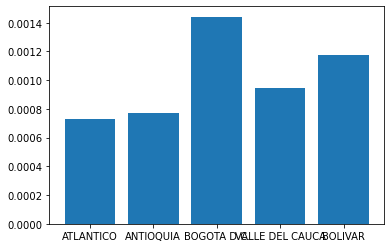

In [442]:
plt.bar(mergefinal["DEPARTAMENTO"],mergefinal["CANTIDAD Homicidios Transito"])
plt.show

<BarContainer object of 5 artists>

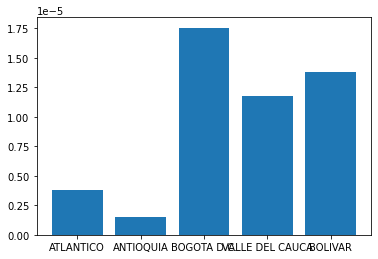

In [445]:
plt.bar(mergefinal["DEPARTAMENTO"],mergefinal["CANTIDAD Terrorismo"])